# Box 1: ACC, low EKE

In [1]:
import xarray as xr
import numpy as np
import gsw
import matplotlib.pyplot as plt
import matplotlib as mpl
from importlib import reload
from cmocean import cm as cmo
import xrft
import pandas as pd


import density_funcs as df
import EV_funcs as ef
import filt_funcs as ff
import plot_funcs as pf
import MLD_funcs as mf

In [2]:
reload(df)
reload(ef)
reload(ff)
reload(pf)
reload(mf)

<module 'MLD_funcs' from '/home/amf2288/argo-intern/MLD_funcs.py'>

## Select and Plot Box

In [3]:
box_z = xr.open_dataset('202206_boxes/lon:(-10,0)_lat:(-40,-30)_ds_z.nc')

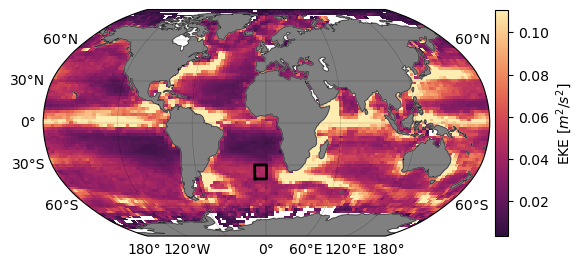

In [4]:
pf.plot_box([[-10,0,-40,-30]])

In [5]:
box_z = mf.get_MLD(box_z)
box_z = mf.add_times(box_z)

Text(0.5, 1.0, 'Fractional Months & Years')

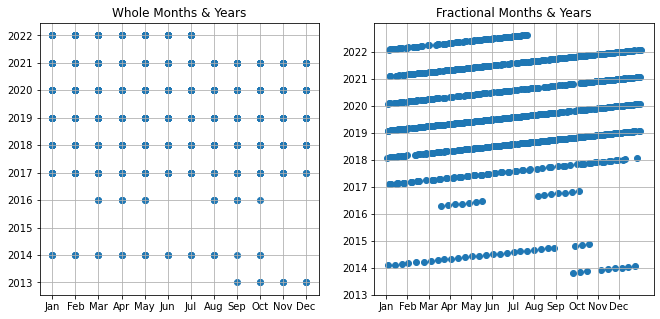

In [6]:
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
plt.figure(figsize=(11,5))

plt.subplot(1,2,1)
plt.scatter(box_z.month,box_z.year)
plt.yticks(range(2013,2023),range(2013,2023))
plt.xticks(range(1,13),months)
plt.grid()
plt.title('Whole Months & Years')

plt.subplot(1,2,2)
plt.scatter(box_z.month_frac,box_z.year_frac)
plt.yticks(range(2013,2023),range(2013,2023))
plt.xticks(range(1,13),months)
plt.grid()
plt.title('Fractional Months & Years')

## Plot Tracers and Profiles

In [7]:
n=0
mean_prof = box_z.SPICE.isel(PRES_INTERPOLATED=n).mean(skipna=True)
this_prof = box_z.SPICE.isel(PRES_INTERPOLATED=n) - mean_prof

for n in range(1,len(box_z.PRES_INTERPOLATED)):
    mean_prof      = box_z.SPICE.isel(PRES_INTERPOLATED=n).mean(skipna=True)
    this_prof_next = box_z.SPICE.isel(PRES_INTERPOLATED=n) - mean_prof

    this_prof = xr.concat([this_prof, this_prof_next], dim='PRES_INTERPOLATED')
    
SPICE_anom = this_prof

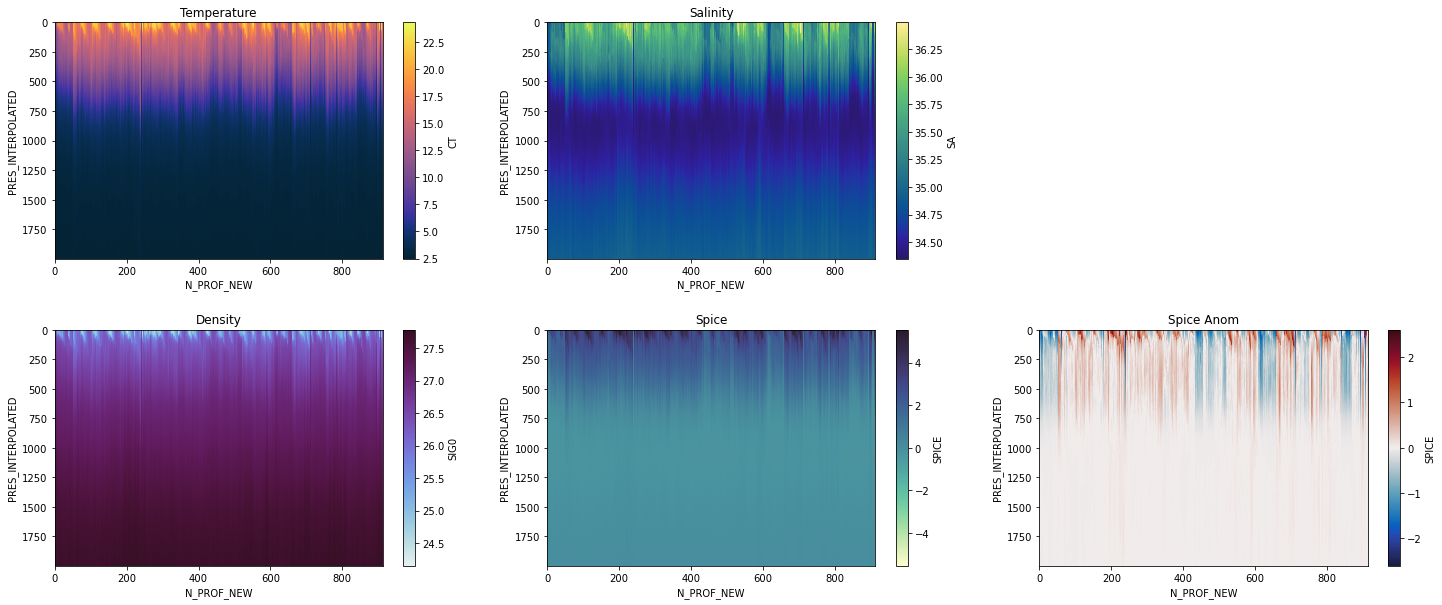

In [8]:
plt.figure(figsize=(25,10))

plt.subplot(2,3,1)
box_z.CT.plot(x='N_PROF_NEW',y='PRES_INTERPOLATED',cmap=cmo.thermal)
plt.gca().invert_yaxis()
plt.title('Temperature')

plt.subplot(2,3,2)
box_z.SA.plot(x='N_PROF_NEW',y='PRES_INTERPOLATED',cmap=cmo.haline)
plt.gca().invert_yaxis()
plt.title('Salinity')

plt.subplot(2,3,4)
box_z.SIG0.plot(x='N_PROF_NEW',y='PRES_INTERPOLATED',cmap=cmo.dense)
plt.gca().invert_yaxis()
plt.title('Density')

plt.subplot(2,3,5)
box_z.SPICE.plot(x='N_PROF_NEW',y='PRES_INTERPOLATED',cmap=cmo.deep)
plt.gca().invert_yaxis()
plt.title('Spice')

plt.subplot(2,3,6)
SPICE_anom.plot(x='N_PROF_NEW',y='PRES_INTERPOLATED',cmap=cmo.balance)
plt.gca().invert_yaxis()
plt.title('Spice Anom')

plt.subplots_adjust(hspace=0.3)

In [9]:
l1 =  50
l2 = 100
l3 = 200

In [10]:
CT_l1 = ff.get_filt_single(box_z,l1,'CT')
CT_l2 = ff.get_filt_single(box_z,l2,'CT')
CT_l3 = ff.get_filt_single(box_z,l3,'CT')

SA_l1 = ff.get_filt_single(box_z,l1,'SA')
SA_l2 = ff.get_filt_single(box_z,l2,'SA')
SA_l3 = ff.get_filt_single(box_z,l3,'SA')

SIG0_l1 = ff.get_filt_single(box_z,l1,'SIG0')
SIG0_l2 = ff.get_filt_single(box_z,l2,'SIG0')
SIG0_l3 = ff.get_filt_single(box_z,l3,'SIG0')

SPICE_l1 = ff.get_filt_single(box_z,l1,'SPICE')
SPICE_l2 = ff.get_filt_single(box_z,l2,'SPICE')
SPICE_l3 = ff.get_filt_single(box_z,l3,'SPICE')

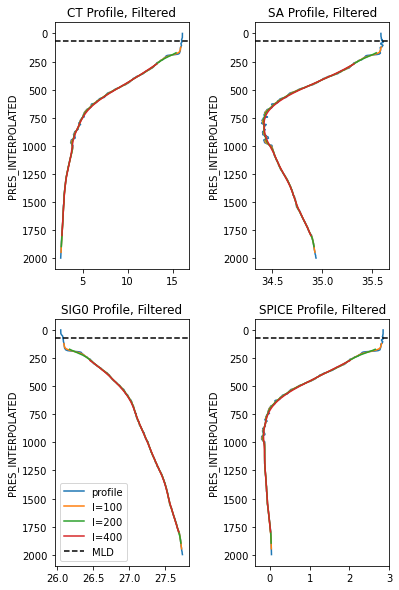

In [11]:
n=63
plt.figure(figsize=(6,10))

plt.subplot(2,2,1)
box_z.CT.isel(N_PROF=n).plot(y='PRES_INTERPOLATED')
CT_l1.where(CT_l1.mask==1).isel(N_PROF=n).plot(y='PRES_INTERPOLATED')
CT_l2.where(CT_l2.mask==1).isel(N_PROF=n).plot(y='PRES_INTERPOLATED')
CT_l3.where(CT_l3.mask==1).isel(N_PROF=n).plot(y='PRES_INTERPOLATED')
plt.axhline(box_z.MLD.isel(N_PROF=n),color='k',linestyle='--',label='MLD')
plt.gca().invert_yaxis()
plt.title('CT Profile, Filtered')

plt.subplot(2,2,2)
box_z.SA.isel(N_PROF=n).plot(y='PRES_INTERPOLATED')
SA_l1.where(CT_l1.mask==1).isel(N_PROF=n).plot(y='PRES_INTERPOLATED')
SA_l2.where(CT_l2.mask==1).isel(N_PROF=n).plot(y='PRES_INTERPOLATED')
SA_l3.where(CT_l3.mask==1).isel(N_PROF=n).plot(y='PRES_INTERPOLATED')
plt.axhline(box_z.MLD.isel(N_PROF=n),color='k',linestyle='--',label='MLD')
plt.gca().invert_yaxis()
plt.title('SA Profile, Filtered')

plt.subplot(2,2,3)
box_z.SIG0.isel(N_PROF=n).plot(y='PRES_INTERPOLATED',label='profile')
SIG0_l1.where(CT_l1.mask==1).isel(N_PROF=n).plot(y='PRES_INTERPOLATED',label='l=100')
SIG0_l2.where(CT_l2.mask==1).isel(N_PROF=n).plot(y='PRES_INTERPOLATED',label='l=200')
SIG0_l3.where(CT_l3.mask==1).isel(N_PROF=n).plot(y='PRES_INTERPOLATED',label='l=400')
plt.axhline(box_z.MLD.isel(N_PROF=n),color='k',linestyle='--',label='MLD')
plt.gca().invert_yaxis()
plt.legend()
plt.title('SIG0 Profile, Filtered')

plt.subplot(2,2,4)
box_z.SPICE.isel(N_PROF=n).plot(y='PRES_INTERPOLATED')
SPICE_l1.where(CT_l1.mask==1).isel(N_PROF=n).plot(y='PRES_INTERPOLATED')
SPICE_l2.where(CT_l2.mask==1).isel(N_PROF=n).plot(y='PRES_INTERPOLATED')
SPICE_l3.where(CT_l3.mask==1).isel(N_PROF=n).plot(y='PRES_INTERPOLATED')
plt.axhline(box_z.MLD.isel(N_PROF=n),color='k',linestyle='--',label='MLD')
plt.gca().invert_yaxis()
plt.title('SPICE Profile, Filtered')

plt.subplots_adjust(wspace=0.5)

## Plot MLD

In [12]:
Jan = box_z.where(box_z.month<2)                       .dropna('N_PROF')
Feb = box_z.where(box_z.month<3) .where(box_z.month>1) .dropna('N_PROF')
Mar = box_z.where(box_z.month<4) .where(box_z.month>2) .dropna('N_PROF')
Apr = box_z.where(box_z.month<5) .where(box_z.month>3) .dropna('N_PROF')
May = box_z.where(box_z.month<6) .where(box_z.month>4) .dropna('N_PROF')
Jun = box_z.where(box_z.month<7) .where(box_z.month>5) .dropna('N_PROF')
Jul = box_z.where(box_z.month<8) .where(box_z.month>6) .dropna('N_PROF')
Aug = box_z.where(box_z.month<9) .where(box_z.month>7) .dropna('N_PROF')
Sep = box_z.where(box_z.month<10).where(box_z.month>8) .dropna('N_PROF')
Oct = box_z.where(box_z.month<11).where(box_z.month>9) .dropna('N_PROF')
Nov = box_z.where(box_z.month<12).where(box_z.month>10).dropna('N_PROF')
Dec = box_z.where(box_z.month<13).where(box_z.month>11).dropna('N_PROF')

Months = [Jan, Feb, Mar, Apr, May, Jun, Jul, Aug, Sep, Oct, Nov, Dec]

Text(0.5, 1.0, 'Spice Profiles')

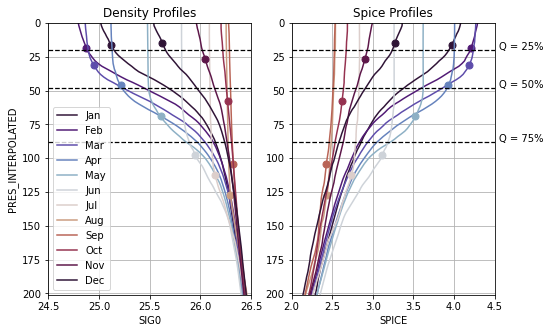

In [13]:
low  = 0.25
mid  = 0.5
high = 0.75

quantiles = box_z.MLD.quantile([low,mid,high])

plt.figure(figsize=(8,5))
colors = plt.cm.twilight_shifted(np.linspace(0,1,12))

plt.subplot(1,2,1)
for n in range(0,len(Months)):
    SIG0_mean = Months[n].SIG0.mean('N_PROF')
    SIG0_mean.plot(y='PRES_INTERPOLATED',label='{}'.format(months[n]),color=colors[n])
    plt.plot(SIG0_mean.sel(PRES_INTERPOLATED=Months[n].MLD.mean('N_PROF'),method='nearest'),
             Months[n].MLD.mean('N_PROF'),marker='o',markersize=7,color=colors[n])
plt.hlines(quantiles, 24.5, 26.5, linestyle='--', linewidth=1.25, color='k')
plt.ylim(0,201)
plt.xlim(24.5,26.5)
plt.yticks(range(0,201,25),range(0,201,25))
plt.grid()
plt.gca().invert_yaxis()
plt.legend()
plt.title('Density Profiles')

plt.subplot(1,2,2)
for n in range(0,len(Months)):
    SPICE_mean = Months[n].SPICE.mean('N_PROF')
    SPICE_mean.plot(y='PRES_INTERPOLATED',color=colors[n])
    plt.plot(SPICE_mean.sel(PRES_INTERPOLATED=Months[n].MLD.mean('N_PROF'),method='nearest'),
             Months[n].MLD.mean('N_PROF'),marker='o', markersize=7, color=colors[n])
plt.hlines(quantiles, 2, 4.5, linestyle='--', linewidth=1.25, color='k')
plt.text(4.55, quantiles[0], 'Q = {}%'.format(int(low*100)))
plt.text(4.55, quantiles[1], 'Q = {}%'.format(int(mid*100)))
plt.text(4.55, quantiles[2], 'Q = {}%'.format(int(high*100)))
plt.ylabel('')
plt.ylim(0,201)
plt.xlim(2,4.5)
plt.yticks(range(0,201,25),range(0,201,25))
plt.grid()
plt.gca().invert_yaxis()
plt.title('Spice Profiles')

I added 3 hlines to this plot which are the quantiles (Q1, Q2 ie median, and Q3) based on the MLD of every profile in the box. While I chose to plot quartiles here, this can easily be changed for any value on [0,1] with the low,mid,high variables. I chose not to plot the shallowest and deepest MLD because, for this box, the shallowest is 0m and the deepest is almost 500m which isn't very useful to plot here.

Text(0.5, 1.0, '')

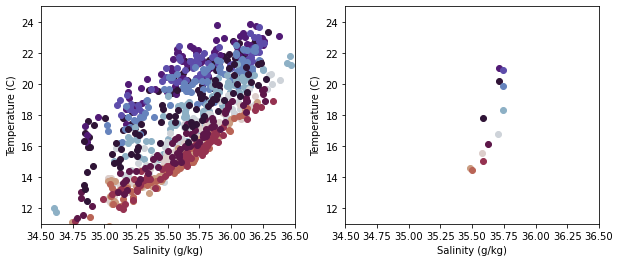

In [14]:
plt.figure(figsize=(10,4))

plt.subplot(121)
for n in range(0,len(Months)):
    mld = Months[n].MLD.mean('N_PROF')
    plt.scatter(Months[n].SA.sel(PRES_INTERPOLATED=mld,method='nearest'), 
                Months[n].CT.sel(PRES_INTERPOLATED=mld,method='nearest'), color=colors[n])
plt.xlim(34.5,36.5)
plt.ylim(11,25)
plt.xlabel('Salinity (g/kg)')
plt.ylabel('Temperature (C)')
plt.title('')

plt.subplot(122)
for n in range(0,len(Months)):
    mld = Months[n].MLD.mean('N_PROF')
    plt.scatter(Months[n].SA.sel(PRES_INTERPOLATED=mld,method='nearest').mean('N_PROF'), 
                Months[n].CT.sel(PRES_INTERPOLATED=mld,method='nearest').mean('N_PROF'), color=colors[n])
plt.xlim(34.5,36.5)
plt.ylim(11,25)
plt.xlabel('Salinity (g/kg)')
plt.ylabel('Temperature (C)')
plt.title('')

## Plot Spectra

In [15]:
SIG0_spec  = xrft.power_spectrum(box_z.SIG0.mean('N_PROF'), dim='PRES_INTERPOLATED',window='hamming')
SPICE_spec = xrft.power_spectrum(box_z.SPICE.mean('N_PROF'),dim='PRES_INTERPOLATED',window='hamming')
SIG0_m  = SIG0_spec.freq_PRES_INTERPOLATED
SPICE_m = SPICE_spec.freq_PRES_INTERPOLATED

Text(0.5, 1.0, 'Spice Spectra')

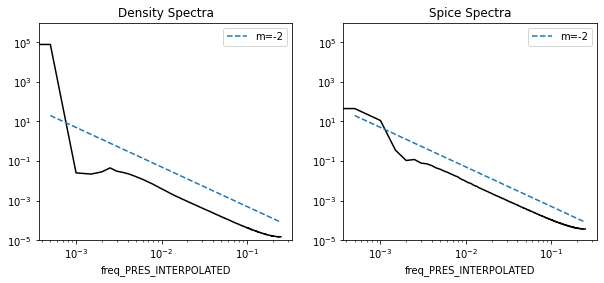

In [16]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
SIG0_spec.plot(color='k')
plt.plot(SIG0_m, 5e-6*SIG0_m**-2,'--',color='tab:blue',label='m=-2')
#plt.plot(SIG0_m, 5e-9*SIG0_m**-3,'--',color='tab:red', label='m=-3')
plt.legend()
plt.ylim(1e-5, 1e6)
plt.xscale('log')
plt.yscale('log')
plt.title('Density Spectra')


plt.subplot(1,2,2)
SPICE_spec.plot(color='k')
plt.plot(SPICE_m, 5e-6*SPICE_m**(-2),'--',color='tab:blue',label='m=-2')
#plt.plot(SPICE_m, 5e-6*SPICE_m**(-3),'--',color='tab:red', label='m=-3')
plt.legend()
plt.ylim(1e-5, 1e6)
plt.xscale('log')
plt.yscale('log')
plt.title('Spice Spectra')

Note that there isn't a slope change in this region. Other than that, this shows what I'd expect:
- density has a greater large-scale signal that drops off steeply
- spice has a smaller large-scale signal, but it has a greater small-scale signal

## Plot Ratios

In [211]:
mke1_d = ef.get_MV(box_z,l1,variable='SIG0')
mke2_d = ef.get_MV(box_z,l2,variable='SIG0')
mke3_d = ef.get_MV(box_z,l3,variable='SIG0')

eke1_d = ef.get_EV(box_z,l1,variable='SIG0')
eke2_d = ef.get_EV(box_z,l2,variable='SIG0')
eke3_d = ef.get_EV(box_z,l3,variable='SIG0')

mke1_s = ef.get_MV(box_z,l1,variable='SPICE')
mke2_s = ef.get_MV(box_z,l2,variable='SPICE')
mke3_s = ef.get_MV(box_z,l3,variable='SPICE')

eke1_s = ef.get_EV(box_z,l1,variable='SPICE')
eke2_s = ef.get_EV(box_z,l2,variable='SPICE')
eke3_s = ef.get_EV(box_z,l3,variable='SPICE')

In [18]:
MKE0_d = eke1_d.where(eke3_d.mask==1)
MKE1_d = mke1_d.where(mke3_d.mask==1) - mke2_d.where(mke3_d.mask==1)
MKE2_d = mke2_d.where(mke3_d.mask==1) - mke3_d.where(mke3_d.mask==1)
MKE3_d = mke3_d.where(mke3_d.mask==1)

EKE0_d = eke1_d.where(eke3_d.mask==1)
EKE1_d = eke2_d.where(eke3_d.mask==1) - eke1_d.where(eke3_d.mask==1)
EKE2_d = eke3_d.where(eke3_d.mask==1) - eke2_d.where(eke3_d.mask==1)
EKE3_d = mke3_d.where(mke3_d.mask==1)

MKE0_s = eke1_s.where(eke3_d.mask==1)
MKE1_s = mke1_s.where(mke3_d.mask==1) - mke2_s.where(mke3_d.mask==1)
MKE2_s = mke2_s.where(mke3_d.mask==1) - mke3_s.where(mke3_d.mask==1)
MKE3_s = mke3_s.where(mke3_d.mask==1)

EKE0_s = eke1_s.where(eke3_d.mask==1)
EKE1_s = eke2_s.where(eke3_d.mask==1) - eke1_s.where(eke3_d.mask==1)
EKE2_s = eke3_s.where(eke3_d.mask==1) - eke2_s.where(eke3_d.mask==1)
EKE3_s = mke3_s.where(mke3_d.mask==1)

In [208]:
lat_sort = box_z.sortby('LATITUDE')
number=np.arange(0,len(box_z.N_PROF))
lat_sort.coords['N_PROF_SORT'] = xr.DataArray(number,dims=EKE0_s.N_PROF.dims)

In [212]:
EKE0_s = EKE0_s.sortby('LATITUDE')
number=np.arange(0,len(EKE0_s.N_PROF))
EKE0_s.coords['N_PROF_SORT'] = xr.DataArray(number,dims=EKE0_s.N_PROF.dims)

EKE1_s = EKE1_s.sortby('LATITUDE')
number=np.arange(0,len(EKE1_s.N_PROF))
EKE1_s.coords['N_PROF_SORT'] = xr.DataArray(number,dims=EKE1_s.N_PROF.dims)

EKE2_s = EKE2_s.sortby('LATITUDE')
number=np.arange(0,len(EKE2_s.N_PROF))
EKE2_s.coords['N_PROF_SORT'] = xr.DataArray(number,dims=EKE2_s.N_PROF.dims)

EKE3_s = EKE3_s.sortby('LATITUDE')
number=np.arange(0,len(EKE3_s.N_PROF))
EKE3_s.coords['N_PROF_SORT'] = xr.DataArray(number,dims=EKE3_s.N_PROF.dims)

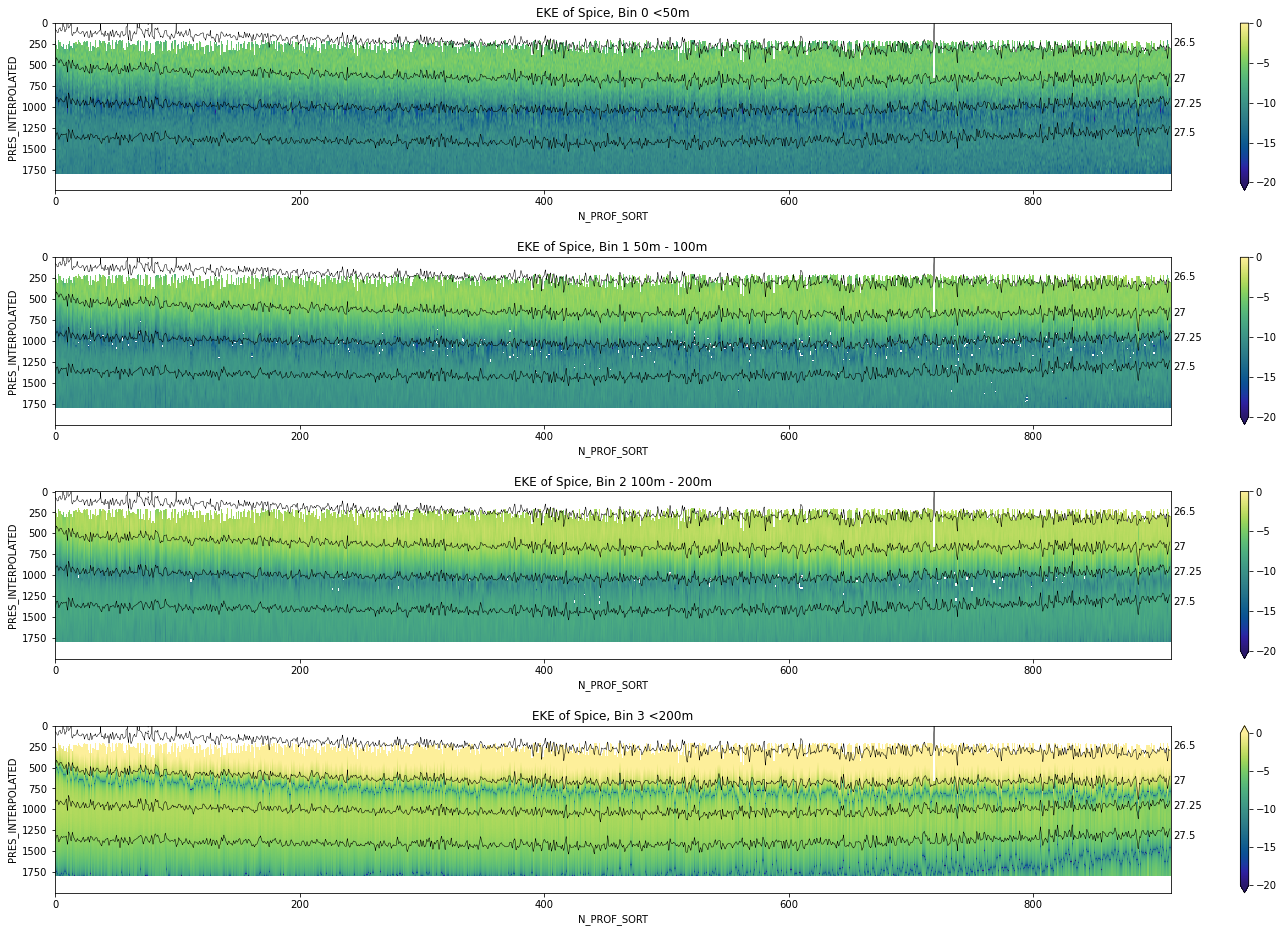

In [260]:
levels = [26.5,27,27.25,27.5]
depths = [275,700,1000,1350]
plt.figure(figsize=(25,16))

plt.subplot(411)
np.log(EKE0_s).plot(x='N_PROF_SORT',y='PRES_INTERPOLATED',cmap=cmo.haline,vmin=-20,vmax=0)
lat_sort.SIG0.plot.contour(y='PRES_INTERPOLATED',x='N_PROF_SORT', levels=levels, colors='k', linewidths=0.5)
plt.text(915,depths[0],levels[0])
plt.text(915,depths[1],levels[1])
plt.text(915,depths[2],levels[2])
plt.text(915,depths[3],levels[3])
plt.gca().invert_yaxis()
plt.title('EKE of Spice, Bin 0 <{}m'.format(l1))

plt.subplot(412)
np.log(EKE1_s).plot(x='N_PROF_SORT',y='PRES_INTERPOLATED',cmap=cmo.haline,vmin=-20,vmax=0)
lat_sort.SIG0.plot.contour(y='PRES_INTERPOLATED',x='N_PROF_SORT', levels=levels, colors='k', linewidths=0.5)
plt.text(915,depths[0],levels[0])
plt.text(915,depths[1],levels[1])
plt.text(915,depths[2],levels[2])
plt.text(915,depths[3],levels[3])
plt.gca().invert_yaxis()
plt.title('EKE of Spice, Bin 1 {}m - {}m'.format(l1, l2))

plt.subplot(413)
np.log(EKE2_s).plot(x='N_PROF_SORT',y='PRES_INTERPOLATED',cmap=cmo.haline,vmin=-20,vmax=0)
lat_sort.SIG0.plot.contour(y='PRES_INTERPOLATED',x='N_PROF_SORT', levels=levels, colors='k', linewidths=0.5)
plt.text(915,depths[0],levels[0])
plt.text(915,depths[1],levels[1])
plt.text(915,depths[2],levels[2])
plt.text(915,depths[3],levels[3])
plt.gca().invert_yaxis()
plt.title('EKE of Spice, Bin 2 {}m - {}m'.format(l2, l3))

plt.subplot(414)
np.log(EKE3_s).plot(x='N_PROF_SORT',y='PRES_INTERPOLATED',cmap=cmo.haline,vmin=-20,vmax=0)
lat_sort.SIG0.plot.contour(y='PRES_INTERPOLATED',x='N_PROF_SORT', levels=levels, colors='k', linewidths=0.5)
plt.text(915,depths[0],levels[0])
plt.text(915,depths[1],levels[1])
plt.text(915,depths[2],levels[2])
plt.text(915,depths[3],levels[3])
plt.gca().invert_yaxis()
plt.title('EKE of Spice, Bin 3 <{}m'.format(l3))

plt.subplots_adjust(hspace=0.4)

## Next step is to add density-space version of this plot

Text(0.5, 1.0, 'Salinity')

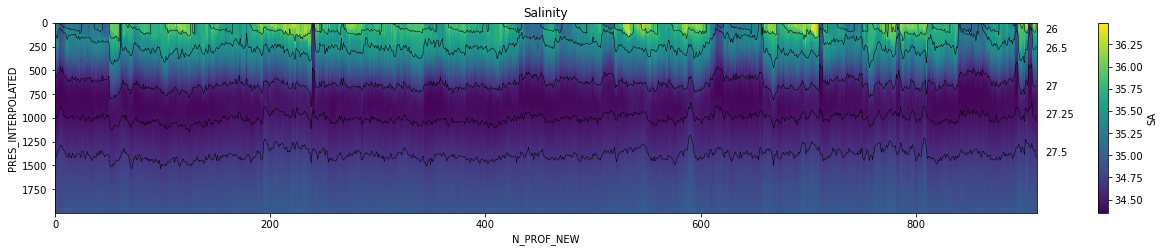

In [20]:
levels = [26,26.5,27,27.25,27.5]
depths = [100,300,700,1000,1400]

plt.figure(figsize=(22,3.5))

box_z.SA.plot(x='N_PROF_NEW', y='PRES_INTERPOLATED')
box_z.SIG0.plot.contour(y='PRES_INTERPOLATED',x='N_PROF_NEW', levels=levels, colors='k', linewidths=0.5)
plt.gca().invert_yaxis()
for n in range(0,len(levels)):
    plt.text(920,depths[n],levels[n])
plt.title('Salinity')

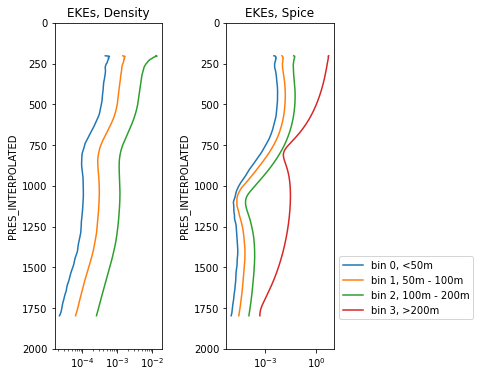

In [21]:
plt.figure(figsize=(5,6))

plt.subplot(1,2,1)
EKE0_d.mean('N_PROF').plot(y='PRES_INTERPOLATED')
EKE1_d.mean('N_PROF').plot(y='PRES_INTERPOLATED')
EKE2_d.mean('N_PROF').plot(y='PRES_INTERPOLATED')
#EKE3_d.mean('N_PROF').plot(y='PRES_INTERPOLATED')
plt.xscale('log')
plt.yticks(range(0,2001,250),range(0,2001,250))
plt.gca().invert_yaxis()
plt.title('EKEs, Density')

plt.subplot(1,2,2)
EKE0_s.mean('N_PROF').plot(y='PRES_INTERPOLATED',label='bin 0, <{}m'.format(l1))
EKE1_s.mean('N_PROF').plot(y='PRES_INTERPOLATED',label='bin 1, {}m - {}m'.format(l1,l2))
EKE2_s.mean('N_PROF').plot(y='PRES_INTERPOLATED',label='bin 2, {}m - {}m'.format(l2,l3))
EKE3_s.mean('N_PROF').plot(y='PRES_INTERPOLATED',label='bin 3, >{}m'.format(l3))
#plt.axhline(box_z.MLD.min()+l3,color='k')
plt.xscale('log')
plt.yticks(range(0,2001,250),range(0,2001,250))
plt.gca().invert_yaxis()
plt.legend(bbox_to_anchor=(1,0.3))
plt.title('EKEs, Spice')

plt.subplots_adjust(wspace=0.6)

The xr.mean method excludes nans, which means the profiles here start at the value of the shallowest MLD and the averaging function only selects values that aren't nan to compute the final profile.

In [22]:
R_ex_d = EKE0_d.mean('N_PROF') / MKE3_d.mean('N_PROF')
R_ex_s = EKE0_s.mean('N_PROF') / MKE3_s.mean('N_PROF')

In [23]:
R_l1_d = eke1_d.where(eke3_d.mask==1).mean('N_PROF') / mke1_d.where(eke3_d.mask==1).mean('N_PROF')
R_l2_d = eke2_d.where(eke3_d.mask==1).mean('N_PROF') / mke2_d.where(eke3_d.mask==1).mean('N_PROF')
R_l3_d = eke3_d.where(eke3_d.mask==1).mean('N_PROF') / mke3_d.where(eke3_d.mask==1).mean('N_PROF')

R_l1_s = eke1_s.where(eke3_d.mask==1).mean('N_PROF') / mke1_s.where(eke3_s.mask==1).mean('N_PROF')
R_l2_s = eke2_s.where(eke3_d.mask==1).mean('N_PROF') / mke2_s.where(eke3_s.mask==1).mean('N_PROF')
R_l3_s = eke3_s.where(eke3_d.mask==1).mean('N_PROF') / mke3_s.where(eke3_s.mask==1).mean('N_PROF')

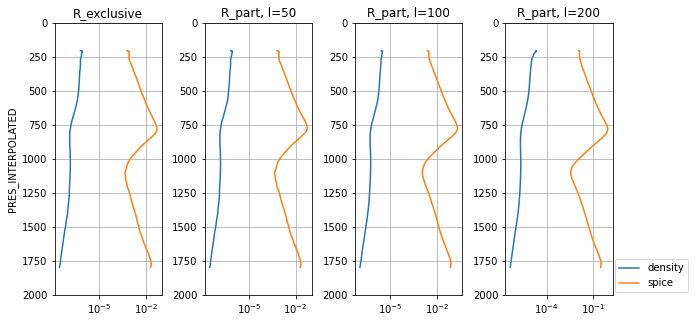

In [24]:
plt.figure(figsize=(10,5))

plt.subplot(1,4,1)
R_ex_d.plot(y='PRES_INTERPOLATED',label='density')
R_ex_s.plot(y='PRES_INTERPOLATED',label='spice')
plt.yticks(range(0,2001,250),range(0,2001,250))
plt.gca().invert_yaxis()
plt.grid()
plt.xscale('log')
plt.title('R_exclusive')

plt.subplot(1,4,2)
R_l1_d.plot(y='PRES_INTERPOLATED',label='density')
R_l1_s.plot(y='PRES_INTERPOLATED',label='spice')
plt.yticks(range(0,2001,250),range(0,2001,250))
plt.gca().invert_yaxis()
plt.grid()
plt.xscale('log')
plt.ylabel('')
plt.title('R_part, l={}'.format(l1))

plt.subplot(1,4,3)
R_l2_d.plot(y='PRES_INTERPOLATED',label='density')
R_l2_s.plot(y='PRES_INTERPOLATED',label='spice')
plt.yticks(range(0,2001,250),range(0,2001,250))
plt.gca().invert_yaxis()
plt.grid()
plt.xscale('log')
plt.ylabel('')
plt.title('R_part, l={}'.format(l2))

plt.subplot(1,4,4)
R_l3_d.plot(y='PRES_INTERPOLATED',label='density')
R_l3_s.plot(y='PRES_INTERPOLATED',label='spice')
plt.yticks(range(0,2001,250),range(0,2001,250))
plt.gca().invert_yaxis()
plt.grid()
plt.xscale('log')
plt.ylabel('')
plt.legend(bbox_to_anchor=(1.75,0.15))
plt.title('R_part, l={}'.format(l3))

plt.subplots_adjust(wspace=0.4)

## Plot Variance by Scale and Depth

In [25]:
q1 = 0.25
q2 = 0.50
q3 = 0.75

In [26]:
EKE0_dmq = EKE0_d.sum('PRES_INTERPOLATED').groupby('month').quantile((q1,q2,q3))
EKE1_dmq = EKE1_d.sum('PRES_INTERPOLATED').groupby('month').quantile((q1,q2,q3))
EKE2_dmq = EKE2_d.sum('PRES_INTERPOLATED').groupby('month').quantile((q1,q2,q3))
EKE3_dmq = EKE3_d.sum('PRES_INTERPOLATED').groupby('month').quantile((q1,q2,q3))

EKE0_smq = EKE0_s.sum('PRES_INTERPOLATED').groupby('month').quantile((q1,q2,q3))
EKE1_smq = EKE1_s.sum('PRES_INTERPOLATED').groupby('month').quantile((q1,q2,q3))
EKE2_smq = EKE2_s.sum('PRES_INTERPOLATED').groupby('month').quantile((q1,q2,q3))
EKE3_smq = EKE3_s.sum('PRES_INTERPOLATED').groupby('month').quantile((q1,q2,q3))

In [27]:
EKE0_dyq = EKE0_d.sum('PRES_INTERPOLATED').groupby('year').quantile((q1,q2,q3))
EKE1_dyq = EKE1_d.sum('PRES_INTERPOLATED').groupby('year').quantile((q1,q2,q3))
EKE2_dyq = EKE2_d.sum('PRES_INTERPOLATED').groupby('year').quantile((q1,q2,q3))
EKE3_dyq = EKE3_d.sum('PRES_INTERPOLATED').groupby('year').quantile((q1,q2,q3))

EKE0_syq = EKE0_s.sum('PRES_INTERPOLATED').groupby('year').quantile((q1,q2,q3))
EKE1_syq = EKE1_s.sum('PRES_INTERPOLATED').groupby('year').quantile((q1,q2,q3))
EKE2_syq = EKE2_s.sum('PRES_INTERPOLATED').groupby('year').quantile((q1,q2,q3))
EKE3_syq = EKE3_s.sum('PRES_INTERPOLATED').groupby('year').quantile((q1,q2,q3))

In [28]:
x_m = EKE0_dmq.month
x_y = EKE0_dyq.year

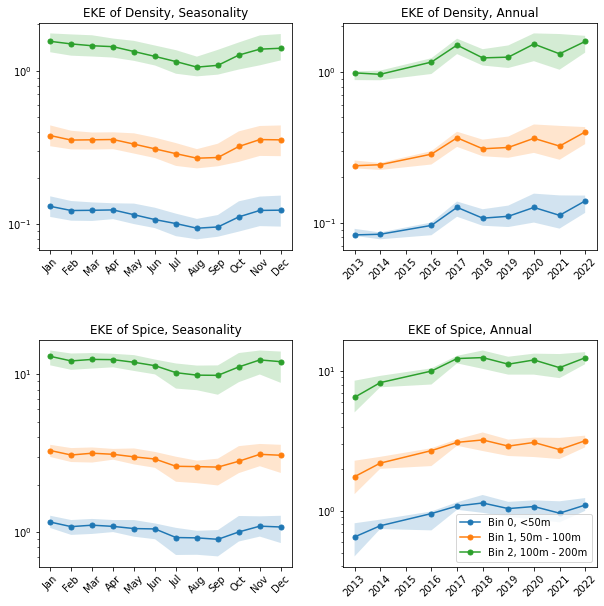

In [258]:
plt.figure(figsize=(10,10))

plt.subplot(221)
plt.plot(x_m,EKE0_dmq.isel(quantile=1),marker='o',markersize=5)
plt.plot(x_m,EKE1_dmq.isel(quantile=1),marker='o',markersize=5)
plt.plot(x_m,EKE2_dmq.isel(quantile=1),marker='o',markersize=5)
plt.fill_between(x_m, EKE0_dmq.isel(quantile=0), EKE0_dmq.isel(quantile=2), alpha=0.2)
plt.fill_between(x_m, EKE1_dmq.isel(quantile=0), EKE1_dmq.isel(quantile=2), alpha=0.2)
plt.fill_between(x_m, EKE2_dmq.isel(quantile=0), EKE2_dmq.isel(quantile=2), alpha=0.2)
plt.xticks(ticks=range(1,13),labels=months,rotation=45)
plt.yscale('log')
plt.title('EKE of Density, Seasonality')

plt.subplot(222)
plt.plot(x_y,EKE0_dyq.isel(quantile=1),marker='o',markersize=5)
plt.plot(x_y,EKE1_dyq.isel(quantile=1),marker='o',markersize=5)
plt.plot(x_y,EKE2_dyq.isel(quantile=1),marker='o',markersize=5)
plt.fill_between(x_y, EKE0_dyq.isel(quantile=0), EKE0_dyq.isel(quantile=2), alpha=0.2)
plt.fill_between(x_y, EKE1_dyq.isel(quantile=0), EKE1_dyq.isel(quantile=2), alpha=0.2)
plt.fill_between(x_y, EKE2_dyq.isel(quantile=0), EKE2_dyq.isel(quantile=2), alpha=0.2)
plt.xticks(ticks=range(2013,2023,1),labels=range(2013,2023,1),rotation=45)
plt.yscale('log')
plt.title('EKE of Density, Annual')

plt.subplot(223)
plt.plot(x_m,EKE0_smq.isel(quantile=1),marker='o',markersize=5)
plt.plot(x_m,EKE1_smq.isel(quantile=1),marker='o',markersize=5)
plt.plot(x_m,EKE2_smq.isel(quantile=1),marker='o',markersize=5)
plt.fill_between(x_m, EKE0_smq.isel(quantile=0), EKE0_smq.isel(quantile=2), alpha=0.2)
plt.fill_between(x_m, EKE1_smq.isel(quantile=0), EKE1_smq.isel(quantile=2), alpha=0.2)
plt.fill_between(x_m, EKE2_smq.isel(quantile=0), EKE2_smq.isel(quantile=2), alpha=0.2)
plt.xticks(ticks=range(1,13),labels=months,rotation=45)
plt.yscale('log')
plt.title('EKE of Spice, Seasonality')

plt.subplot(224)
plt.plot(x_y,EKE0_syq.isel(quantile=1),marker='o',markersize=5,label='Bin 0, <{}m'.format(l1))
plt.plot(x_y,EKE1_syq.isel(quantile=1),marker='o',markersize=5,label='Bin 1, {}m - {}m'.format(l1,l2))
plt.plot(x_y,EKE2_syq.isel(quantile=1),marker='o',markersize=5,label='Bin 2, {}m - {}m'.format(l2,l3))
plt.fill_between(x_y, EKE0_syq.isel(quantile=0), EKE0_syq.isel(quantile=2), alpha=0.2)
plt.fill_between(x_y, EKE1_syq.isel(quantile=0), EKE1_syq.isel(quantile=2), alpha=0.2)
plt.fill_between(x_y, EKE2_syq.isel(quantile=0), EKE2_syq.isel(quantile=2), alpha=0.2)
plt.xticks(ticks=range(2013,2023,1),labels=range(2013,2023,1),rotation=45)
plt.yscale('log')
plt.legend()
plt.title('EKE of Spice, Annual')

plt.subplots_adjust(hspace=0.4)

In [31]:
d1 =  250
d2 =  500
d3 = 1000
d4 = 1500

In [32]:
EKE0_dm1 = EKE0_d.where(box_z.PRES_INTERPOLATED==d1).groupby('month').quantile((q1,q2,q3)).sel(PRES_INTERPOLATED=d1)
EKE1_dm1 = EKE1_d.where(box_z.PRES_INTERPOLATED==d1).groupby('month').quantile((q1,q2,q3)).sel(PRES_INTERPOLATED=d1)
EKE2_dm1 = EKE2_d.where(box_z.PRES_INTERPOLATED==d1).groupby('month').quantile((q1,q2,q3)).sel(PRES_INTERPOLATED=d1)
EKE3_dm1 = EKE3_d.where(box_z.PRES_INTERPOLATED==d1).groupby('month').quantile((q1,q2,q3)).sel(PRES_INTERPOLATED=d1)

EKE0_dm2 = EKE0_d.where(box_z.PRES_INTERPOLATED==d2).groupby('month').quantile((q1,q2,q3)).sel(PRES_INTERPOLATED=d2)
EKE1_dm2 = EKE1_d.where(box_z.PRES_INTERPOLATED==d2).groupby('month').quantile((q1,q2,q3)).sel(PRES_INTERPOLATED=d2)
EKE2_dm2 = EKE2_d.where(box_z.PRES_INTERPOLATED==d2).groupby('month').quantile((q1,q2,q3)).sel(PRES_INTERPOLATED=d2)
EKE3_dm2 = EKE3_d.where(box_z.PRES_INTERPOLATED==d2).groupby('month').quantile((q1,q2,q3)).sel(PRES_INTERPOLATED=d2)

EKE0_dm3 = EKE0_d.where(box_z.PRES_INTERPOLATED==d3).groupby('month').quantile((q1,q2,q3)).sel(PRES_INTERPOLATED=d3)
EKE1_dm3 = EKE1_d.where(box_z.PRES_INTERPOLATED==d3).groupby('month').quantile((q1,q2,q3)).sel(PRES_INTERPOLATED=d3)
EKE2_dm3 = EKE2_d.where(box_z.PRES_INTERPOLATED==d3).groupby('month').quantile((q1,q2,q3)).sel(PRES_INTERPOLATED=d3)
EKE3_dm3 = EKE3_d.where(box_z.PRES_INTERPOLATED==d3).groupby('month').quantile((q1,q2,q3)).sel(PRES_INTERPOLATED=d3)

EKE0_dm4 = EKE0_d.where(box_z.PRES_INTERPOLATED==d4).groupby('month').quantile((q1,q2,q3)).sel(PRES_INTERPOLATED=d4)
EKE1_dm4 = EKE1_d.where(box_z.PRES_INTERPOLATED==d4).groupby('month').quantile((q1,q2,q3)).sel(PRES_INTERPOLATED=d4)
EKE2_dm4 = EKE2_d.where(box_z.PRES_INTERPOLATED==d4).groupby('month').quantile((q1,q2,q3)).sel(PRES_INTERPOLATED=d4)
EKE3_dm4 = EKE3_d.where(box_z.PRES_INTERPOLATED==d4).groupby('month').quantile((q1,q2,q3)).sel(PRES_INTERPOLATED=d4)

In [33]:
EKE0_sm1 = EKE0_s.where(box_z.PRES_INTERPOLATED==d1).groupby('month').quantile((q1,q2,q3)).sel(PRES_INTERPOLATED=d1)
EKE1_sm1 = EKE1_s.where(box_z.PRES_INTERPOLATED==d1).groupby('month').quantile((q1,q2,q3)).sel(PRES_INTERPOLATED=d1)
EKE2_sm1 = EKE2_s.where(box_z.PRES_INTERPOLATED==d1).groupby('month').quantile((q1,q2,q3)).sel(PRES_INTERPOLATED=d1)
EKE3_sm1 = EKE3_s.where(box_z.PRES_INTERPOLATED==d1).groupby('month').quantile((q1,q2,q3)).sel(PRES_INTERPOLATED=d1)

EKE0_sm2 = EKE0_s.where(box_z.PRES_INTERPOLATED==d2).groupby('month').quantile((q1,q2,q3)).sel(PRES_INTERPOLATED=d2)
EKE1_sm2 = EKE1_s.where(box_z.PRES_INTERPOLATED==d2).groupby('month').quantile((q1,q2,q3)).sel(PRES_INTERPOLATED=d2)
EKE2_sm2 = EKE2_s.where(box_z.PRES_INTERPOLATED==d2).groupby('month').quantile((q1,q2,q3)).sel(PRES_INTERPOLATED=d2)
EKE3_sm2 = EKE3_s.where(box_z.PRES_INTERPOLATED==d2).groupby('month').quantile((q1,q2,q3)).sel(PRES_INTERPOLATED=d2)

EKE0_sm3 = EKE0_s.where(box_z.PRES_INTERPOLATED==d3).groupby('month').quantile((q1,q2,q3)).sel(PRES_INTERPOLATED=d3)
EKE1_sm3 = EKE1_s.where(box_z.PRES_INTERPOLATED==d3).groupby('month').quantile((q1,q2,q3)).sel(PRES_INTERPOLATED=d3)
EKE2_sm3 = EKE2_s.where(box_z.PRES_INTERPOLATED==d3).groupby('month').quantile((q1,q2,q3)).sel(PRES_INTERPOLATED=d3)
EKE3_sm3 = EKE3_s.where(box_z.PRES_INTERPOLATED==d3).groupby('month').quantile((q1,q2,q3)).sel(PRES_INTERPOLATED=d3)

EKE0_sm4 = EKE0_s.where(box_z.PRES_INTERPOLATED==d4).groupby('month').quantile((q1,q2,q3)).sel(PRES_INTERPOLATED=d4)
EKE1_sm4 = EKE1_s.where(box_z.PRES_INTERPOLATED==d4).groupby('month').quantile((q1,q2,q3)).sel(PRES_INTERPOLATED=d4)
EKE2_sm4 = EKE2_s.where(box_z.PRES_INTERPOLATED==d4).groupby('month').quantile((q1,q2,q3)).sel(PRES_INTERPOLATED=d4)
EKE3_sm4 = EKE3_s.where(box_z.PRES_INTERPOLATED==d4).groupby('month').quantile((q1,q2,q3)).sel(PRES_INTERPOLATED=d4)

Text(0.5, 1.0, 'Density, 1500m depth')

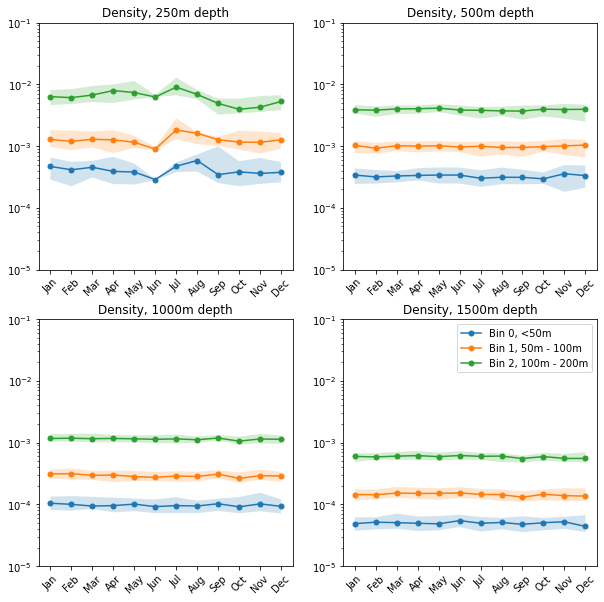

In [246]:
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.plot(x_m, EKE0_dm1.isel(quantile=1),marker='o',markersize=5)
plt.plot(x_m, EKE1_dm1.isel(quantile=1),marker='o',markersize=5)
plt.plot(x_m, EKE2_dm1.isel(quantile=1),marker='o',markersize=5)
plt.fill_between(x_m, EKE0_dm1.isel(quantile=0), EKE0_dm1.isel(quantile=2), alpha=0.2)
plt.fill_between(x_m, EKE1_dm1.isel(quantile=0), EKE1_dm1.isel(quantile=2), alpha=0.2)
plt.fill_between(x_m, EKE2_dm1.isel(quantile=0), EKE2_dm1.isel(quantile=2), alpha=0.2)
plt.xticks(ticks=range(1,13),labels=months,rotation=45)
plt.yscale('log')
plt.ylim((10**-5,10**-1))
plt.title('Density, {}m depth'.format(d1))

plt.subplot(2,2,2)
plt.plot(x_m, EKE0_dm2.isel(quantile=1),marker='o',markersize=5)
plt.plot(x_m, EKE1_dm2.isel(quantile=1),marker='o',markersize=5)
plt.plot(x_m, EKE2_dm2.isel(quantile=1),marker='o',markersize=5)
plt.fill_between(x_m, EKE0_dm2.isel(quantile=0), EKE0_dm2.isel(quantile=2), alpha=0.2)
plt.fill_between(x_m, EKE1_dm2.isel(quantile=0), EKE1_dm2.isel(quantile=2), alpha=0.2)
plt.fill_between(x_m, EKE2_dm2.isel(quantile=0), EKE2_dm2.isel(quantile=2), alpha=0.2)
plt.xticks(ticks=range(1,13),labels=months,rotation=45)
plt.yscale('log')
plt.ylim((10**-5,10**-1))
plt.title('Density, {}m depth'.format(d2))

plt.subplot(2,2,3)
plt.plot(x_m, EKE0_dm3.isel(quantile=1),marker='o',markersize=5)
plt.plot(x_m, EKE1_dm3.isel(quantile=1),marker='o',markersize=5)
plt.plot(x_m, EKE2_dm3.isel(quantile=1),marker='o',markersize=5)
plt.fill_between(x_m, EKE0_dm3.isel(quantile=0), EKE0_dm3.isel(quantile=2), alpha=0.2)
plt.fill_between(x_m, EKE1_dm3.isel(quantile=0), EKE1_dm3.isel(quantile=2), alpha=0.2)
plt.fill_between(x_m, EKE2_dm3.isel(quantile=0), EKE2_dm3.isel(quantile=2), alpha=0.2)
plt.xticks(ticks=range(1,13),labels=months,rotation=45)
plt.yscale('log')
plt.ylim((10**-5,10**-1))
plt.title('Density, {}m depth'.format(d3))

plt.subplot(2,2,4)
plt.plot(x_m, EKE0_dm4.isel(quantile=1),marker='o',markersize=5,label='Bin 0, <{}m'.format(l1))
plt.plot(x_m, EKE1_dm4.isel(quantile=1),marker='o',markersize=5,label='Bin 1, {}m - {}m'.format(l1,l2))
plt.plot(x_m, EKE2_dm4.isel(quantile=1),marker='o',markersize=5,label='Bin 2, {}m - {}m'.format(l2,l3))
plt.fill_between(x_m, EKE0_dm4.isel(quantile=0), EKE0_dm4.isel(quantile=2), alpha=0.2)
plt.fill_between(x_m, EKE1_dm4.isel(quantile=0), EKE1_dm4.isel(quantile=2), alpha=0.2)
plt.fill_between(x_m, EKE2_dm4.isel(quantile=0), EKE2_dm4.isel(quantile=2), alpha=0.2)
plt.xticks(ticks=range(1,13),labels=months,rotation=45)
plt.yscale('log')
plt.ylim((10**-5,10**-1))
plt.legend()
plt.title('Density, {}m depth'.format(d4))

In [247]:
depth_bin=100
EKE0_dm = EKE0_d.groupby('month').mean().groupby_bins('PRES_INTERPOLATED',np.arange(0,2000,depth_bin)).median('PRES_INTERPOLATED')
EKE1_dm = EKE1_d.groupby('month').mean().groupby_bins('PRES_INTERPOLATED',np.arange(0,2000,depth_bin)).median('PRES_INTERPOLATED')
EKE2_dm = EKE2_d.groupby('month').mean().groupby_bins('PRES_INTERPOLATED',np.arange(0,2000,depth_bin)).median('PRES_INTERPOLATED')
EKE3_dm = EKE3_d.groupby('month').mean().groupby_bins('PRES_INTERPOLATED',np.arange(0,2000,depth_bin)).median('PRES_INTERPOLATED')

Text(0.5, 1.0, 'EKE of Density, Bin 2 100m - 200m')

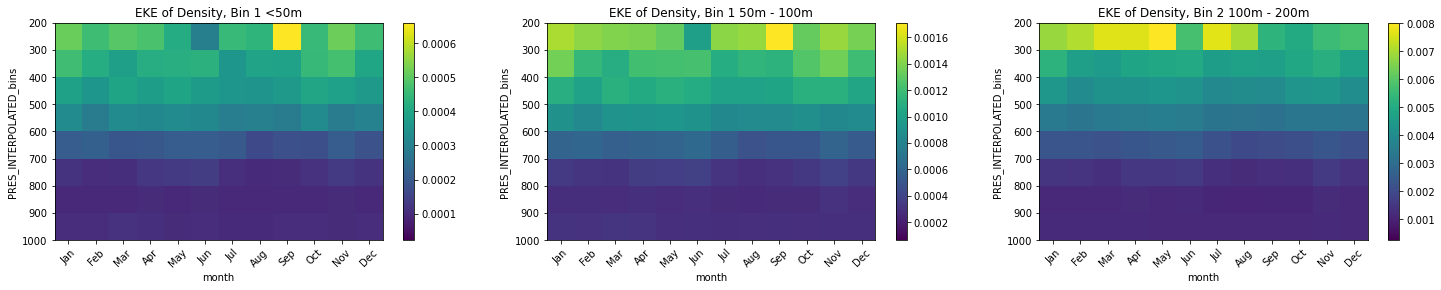

In [255]:
plt.figure(figsize=(25,4))

plt.subplot(131)
EKE0_dm.plot(x='month',y='PRES_INTERPOLATED_bins')
plt.xticks(ticks=range(1,13),labels=months,rotation=45)
plt.yticks(ticks=np.arange(0,2000,100),labels=np.arange(0,2000,100))
plt.gca().invert_yaxis()
plt.ylim(1000,200)
plt.title('EKE of Density, Bin 1 <{}m'.format(l1))

plt.subplot(132)
EKE1_dm.plot(x='month',y='PRES_INTERPOLATED_bins')
plt.xticks(ticks=range(1,13),labels=months,rotation=45)
plt.yticks(ticks=np.arange(0,2000,100),labels=np.arange(0,2000,100))
plt.gca().invert_yaxis()
plt.ylim(1000,200)
plt.title('EKE of Density, Bin 1 {}m - {}m'.format(l1, l2))

plt.subplot(133)
EKE2_dm.plot(x='month',y='PRES_INTERPOLATED_bins')
plt.xticks(ticks=range(1,13),labels=months,rotation=45)
plt.yticks(ticks=np.arange(0,2000,100),labels=np.arange(0,2000,100))
plt.gca().invert_yaxis()
plt.ylim(1000,200)
plt.title('EKE of Density, Bin 2 {}m - {}m'.format(l2, l3))

Text(0.5, 1.0, 'Spice, 1500m depth')

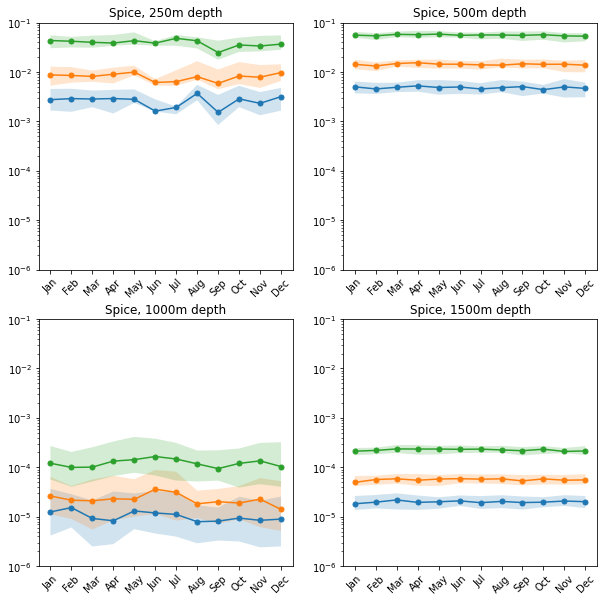

In [36]:
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.plot(x_m, EKE0_sm1.isel(quantile=1),marker='o',markersize=5)
plt.plot(x_m, EKE1_sm1.isel(quantile=1),marker='o',markersize=5)
plt.plot(x_m, EKE2_sm1.isel(quantile=1),marker='o',markersize=5)
plt.fill_between(x_m, EKE0_sm1.isel(quantile=0), EKE0_sm1.isel(quantile=2), alpha=0.2)
plt.fill_between(x_m, EKE1_sm1.isel(quantile=0), EKE1_sm1.isel(quantile=2), alpha=0.2)
plt.fill_between(x_m, EKE2_sm1.isel(quantile=0), EKE2_sm1.isel(quantile=2), alpha=0.2)
plt.xticks(ticks=range(1,13),labels=months,rotation=45)
plt.yscale('log')
plt.ylim((10**-6,10**-1))
plt.title('Spice, {}m depth'.format(d1))

plt.subplot(2,2,2)
plt.plot(x_m, EKE0_sm2.isel(quantile=1),marker='o',markersize=5)
plt.plot(x_m, EKE1_sm2.isel(quantile=1),marker='o',markersize=5)
plt.plot(x_m, EKE2_sm2.isel(quantile=1),marker='o',markersize=5)
plt.fill_between(x_m, EKE0_sm2.isel(quantile=0), EKE0_sm2.isel(quantile=2), alpha=0.2)
plt.fill_between(x_m, EKE1_sm2.isel(quantile=0), EKE1_sm2.isel(quantile=2), alpha=0.2)
plt.fill_between(x_m, EKE2_sm2.isel(quantile=0), EKE2_sm2.isel(quantile=2), alpha=0.2)
plt.xticks(ticks=range(1,13),labels=months,rotation=45)
plt.yscale('log')
plt.ylim((10**-6,10**-1))
plt.title('Spice, {}m depth'.format(d2))

plt.subplot(2,2,3)
plt.plot(x_m, EKE0_sm3.isel(quantile=1),marker='o',markersize=5)
plt.plot(x_m, EKE1_sm3.isel(quantile=1),marker='o',markersize=5)
plt.plot(x_m, EKE2_sm3.isel(quantile=1),marker='o',markersize=5)
plt.fill_between(x_m, EKE0_sm3.isel(quantile=0), EKE0_sm3.isel(quantile=2), alpha=0.2)
plt.fill_between(x_m, EKE1_sm3.isel(quantile=0), EKE1_sm3.isel(quantile=2), alpha=0.2)
plt.fill_between(x_m, EKE2_sm3.isel(quantile=0), EKE2_sm3.isel(quantile=2), alpha=0.2)
plt.xticks(ticks=range(1,13),labels=months,rotation=45)
plt.yscale('log')
plt.ylim((10**-6,10**-1))
plt.title('Spice, {}m depth'.format(d3))

plt.subplot(2,2,4)
plt.plot(x_m, EKE0_sm4.isel(quantile=1),marker='o',markersize=5)
plt.plot(x_m, EKE1_sm4.isel(quantile=1),marker='o',markersize=5)
plt.plot(x_m, EKE2_sm4.isel(quantile=1),marker='o',markersize=5)
plt.fill_between(x_m, EKE0_sm4.isel(quantile=0), EKE0_sm4.isel(quantile=2), alpha=0.2)
plt.fill_between(x_m, EKE1_sm4.isel(quantile=0), EKE1_sm4.isel(quantile=2), alpha=0.2)
plt.fill_between(x_m, EKE2_sm4.isel(quantile=0), EKE2_sm4.isel(quantile=2), alpha=0.2)
plt.xticks(ticks=range(1,13),labels=months,rotation=45)
plt.yscale('log')
plt.ylim((10**-6,10**-1))
plt.title('Spice, {}m depth'.format(d4))

In [241]:
depth_bin=100
EKE0_sm = EKE0_s.groupby('month').mean().groupby_bins('PRES_INTERPOLATED',np.arange(0,2000,depth_bin)).median('PRES_INTERPOLATED')
EKE1_sm = EKE1_s.groupby('month').mean().groupby_bins('PRES_INTERPOLATED',np.arange(0,2000,depth_bin)).median('PRES_INTERPOLATED')
EKE2_sm = EKE2_s.groupby('month').mean().groupby_bins('PRES_INTERPOLATED',np.arange(0,2000,depth_bin)).median('PRES_INTERPOLATED')

Text(0.5, 1.0, 'EKE of Spice, Bin 2 100m - 200m')

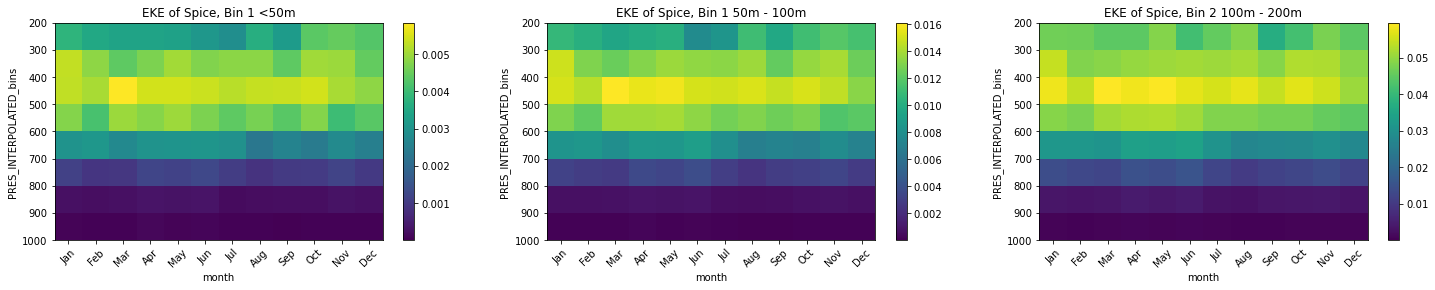

In [243]:
plt.figure(figsize=(25,4))

plt.subplot(131)
EKE0_sm.plot(x='month',y='PRES_INTERPOLATED_bins')
plt.xticks(ticks=range(1,13),labels=months,rotation=45)
plt.yticks(ticks=np.arange(0,2000,100),labels=np.arange(0,2000,100))
plt.gca().invert_yaxis()
plt.ylim(1000,200)
plt.title('EKE of Spice, Bin 1 <{}m'.format(l1))

plt.subplot(132)
EKE1_sm.plot(x='month',y='PRES_INTERPOLATED_bins')
plt.xticks(ticks=range(1,13),labels=months,rotation=45)
plt.yticks(ticks=np.arange(0,2000,100),labels=np.arange(0,2000,100))
plt.gca().invert_yaxis()
plt.ylim(1000,200)
plt.title('EKE of Spice, Bin 1 {}m - {}m'.format(l1, l2))

plt.subplot(133)
EKE2_sm.plot(x='month',y='PRES_INTERPOLATED_bins')
plt.xticks(ticks=range(1,13),labels=months,rotation=45)
plt.yticks(ticks=np.arange(0,2000,100),labels=np.arange(0,2000,100))
plt.gca().invert_yaxis()
plt.ylim(1000,200)
plt.title('EKE of Spice, Bin 2 {}m - {}m'.format(l2, l3))